In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [14]:
data = pd.read_excel('data\data_ford_price.xlsx') 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [27]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

In [8]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

_______________________
Сторонний пример

In [9]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

___________________________________

In [28]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


In [29]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


In [30]:
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)

In [31]:
united_data = pd.concat([data, data_onehot], axis=1)

In [32]:
united_data = united_data.drop(columns=columns_to_change)

In [33]:
united_data.shape

(7017, 30)

In [35]:
data.isnull().sum()

price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64

In [38]:
f" Доля оставшихся при удалении пропусков признака size = {(data[~data['size'].isna()].shape[0] / data.shape[0]):.2f}"

' Доля оставшихся при удалении пропусков признака size = 0.78'

## Масштабирование признаков

In [4]:
data_2 = data[['price', 'year', 'weather']]
data_2.dropna(inplace = True)
data_scaled = data_2.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

C:\Users\ak88r\AppData\Local\Temp\ipykernel_2328\3867150226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.dropna(inplace = True)


,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [7]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 3.041

MAE: 3.041


In [9]:
data_rs = data_2.copy()
x_price = data_rs[col_names]

from sklearn.preprocessing import RobustScaler
rs_model = RobustScaler()

data_rs[col_names] = rs_model.fit_transform(x_price.values)
data_rs['price'][1]

0.1894603976017671

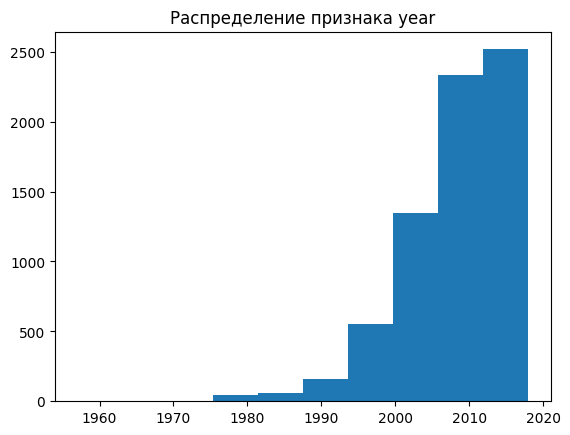

In [10]:
import matplotlib.pyplot as plt
 
plt.hist(data.year)
plt.title('Распределение признака year');

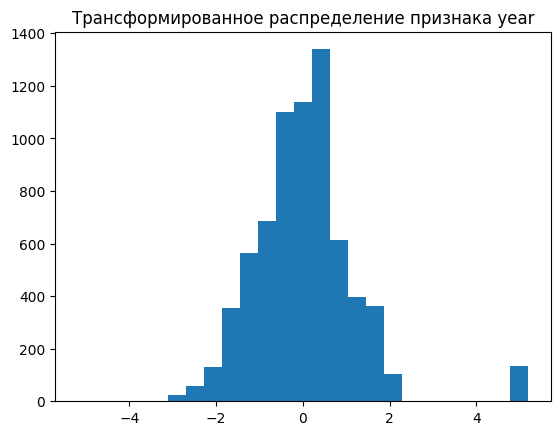

In [11]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

In [26]:
quantile_n = QuantileTransformer()
data_3 = data[['condition', 'cylinders']]
data_3.dropna(inplace=True)
data_4 = data_3.copy()
data_4 = quantile.fit_transform(data_3)
data_4['condition'][0]

C:\Users\ak88r\AppData\Local\Temp\ipykernel_2328\3623214671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.dropna(inplace=True)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [30]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

display(mean_squared_error(y_true, y_pred) ** 0.5)

5.746042116100439